In [151]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import pylab
import scipy.stats as stats
import sklearn.metrics

In [5]:
iris=sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Una regresion lineal consiste en observar la realcion entre dos variables aletorias continuas, esta relacion se definirá por medio de un modelo estadistico, en el cual se encuentre una funcion lineal ajustada a los datos suministrados, con la cual se intentá explicar de la manera mas optima posible la relacion existente de las variables, esto se logra, optimizando el error que pueda existir entre los  valores ajustados por el modelo, contra los valores reales obtenidos en la medicion

In [8]:
iris=iris[["sepal_length","petal_length"]]
iris

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


Antes de realizar cualquier tipo de modelo, es recomendable realizar un analisis exploratorio de los datos, para encontrar posibles realciones existentes entre los mismos

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


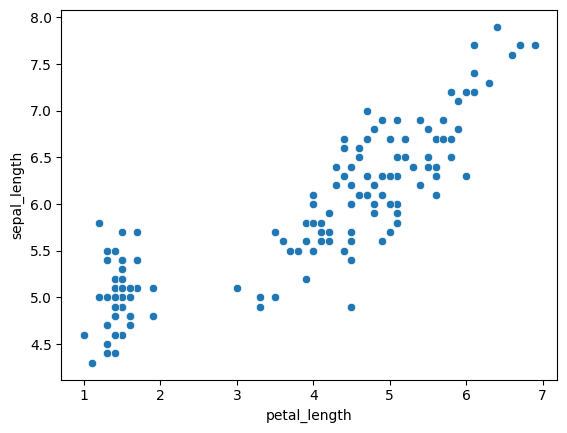

In [10]:
sns.scatterplot(x=iris["petal_length"],y=iris["sepal_length"])
iris.corr()

En el grafico de dispersion se observa que existe una tendencia de aumento entre las dos variables, por lo que se decidío calcular el coeficiente de correlacion de pearson entre estas para observar mediante una estadística si realmente existe una tendencia lineal entre las variables.

Este coeficiente, con un valor de 0.87, confirma lo observado en el diagrama de dispersion, las dos columnas presentan una alta correlacion lineal positiva, por lo que es viable realizar una regresion lineal entre estas variables

En primer lugar, se procede a realizar una particion de los datos en dos subconjuntos, prueba y entrenamiento, esto para poder ajustar el modelo con el primer set de datos, y posteriormente, con el segundo conjunto de datos, validar el desempeño del mismo

In [73]:
x=iris["petal_length"]
y=iris["sepal_length"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=21)


(105,)

In [82]:
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)


In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

En un modelo de regresion ajustado es el siguiente:

$$Y=\beta_1x+\beta_0$$

Como se observa, existen dos parametros a estimar, b0 y b1, que corresponden al intercepto con el eje y la pendiente de la recta respectivamente, vamos a obtenerlos

In [91]:
# y axis intercept
b0=lr.intercept_
b0

4.302215701958001

In [92]:
# slope
b1=lr.coef_
b1

array([0.41533287])

Ahora podemos realizar una prediccion de los valores de sepal_length segun los parametros del modelo

In [145]:
y_pred_test=lr.predict(x_test)

Ahora podemos hacer una visualizacion de los datos de prueba, para observar el ajuste que tuvo el modelo a los datos reales

Text(0, 0.5, 'sepal length')

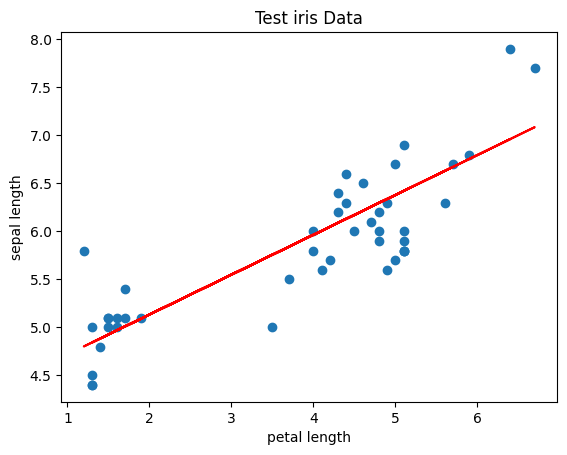

In [109]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test,color="red")
plt.title("Test iris Data")
plt.xlabel("petal length")
plt.ylabel("sepal length")


Despues de ejecutar el modelo, ahora sigue evaluar que tan efectivo fue, para ello se puede unsar metricas como el error cuadratico medio, o el arror absoluto medio

In [153]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_test))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R^2: ", sklearn.metrics.r2_score(y_test,y_pred_test))

Mean Absolute Error:  0.3350712748092976
Mean Squared Error:  0.17438148616177243
RMSE:  0.41759009346699355
R^2:  0.7054858136133535


In [146]:
residuals=y_test-y_pred_test

Text(0.5, 1.0, 'Residuals distribution')

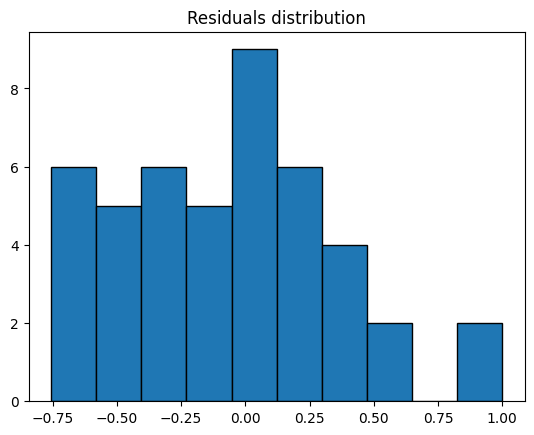

In [147]:
plt.hist(residuals,ec="black")
plt.title("Residuals distribution")


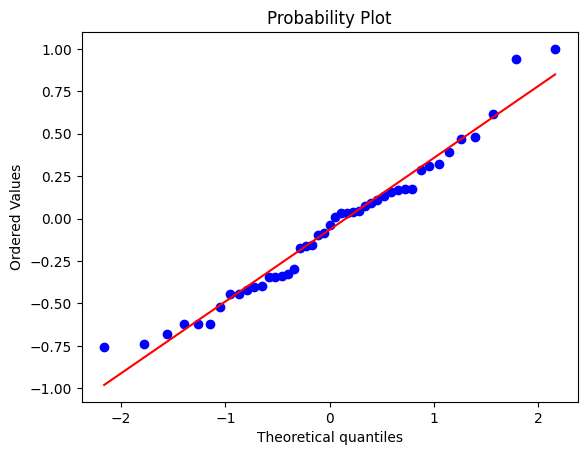

ShapiroResult(statistic=0.9683104574610115, pvalue=0.2512038917605759)

In [149]:
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()
stats.shapiro(residuals)

Se concluye entonces que las variables petal length y sepal length presentan una alta correlacion lineal, lo que dio paso a ajustar un modelo lineal usando petal length como predictor, obteniendo que este modelo logra explicar el 70% de la variabilidad de los datos, ademas de presentar metricas de error bajas, lo que aumenta la confiabilidad en el modelo  